In [89]:
import pandas as pd

In [90]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [91]:
from sklearn.datasets import make_blobs

In [92]:
import numpy as np
np.random.seed(23)

In [93]:
x, y = make_blobs(n_samples = 5000, centers = [[2, 4], [4, 6], [10, 12], [8, 4]], cluster_std = 0.2)

In [94]:
x.shape, y.shape

((5000, 2), (5000,))

In [95]:
x[:5]

array([[1.9607273 , 3.85189233],
       [1.95045009, 4.19750879],
       [8.2305129 , 4.08715381],
       [1.79430322, 4.27443306],
       [2.14147691, 3.93884671]])

In [96]:
y[:5]

array([0, 0, 3, 0, 0])

In [97]:
import matplotlib.pyplot as plt

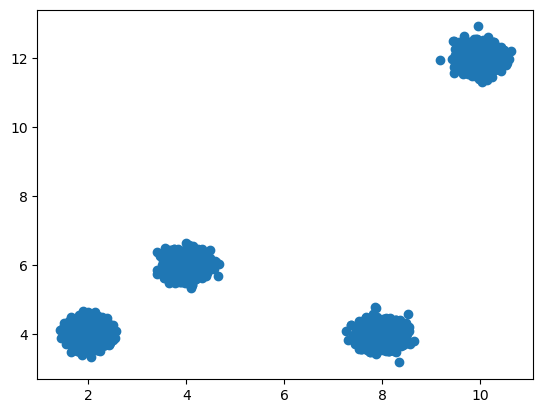

In [98]:
plt.scatter(x[:, 0], x[:, 1])

In [99]:
from sklearn.cluster import KMeans
k_means = KMeans(init = 'k-means++', n_init = 12, n_clusters = 4)

In [100]:
k_means.fit(x, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
labels = k_means.labels_

In [102]:
labels.shape

(5000,)

In [103]:
cluster_centers = k_means.cluster_centers_

In [104]:
cluster_centers

array([[ 7.99949315,  3.99262701],
       [ 9.98909364, 12.00767315],
       [ 3.98927315,  5.99882277],
       [ 1.98912977,  3.99694358]])

In [105]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

In [106]:
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

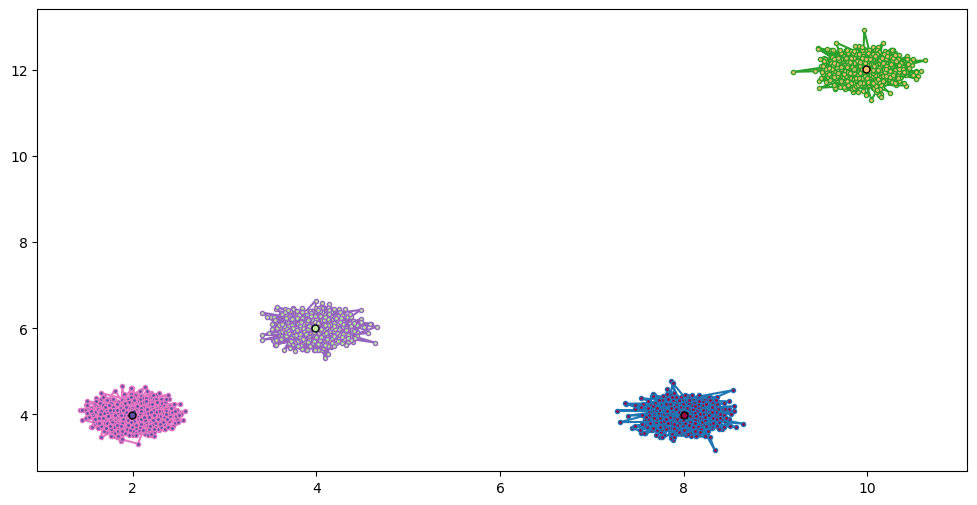

In [107]:
fig = plt.figure(figsize = (12, 6))
axes = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len( [[2, 4], [4, 6], [10, 12], [8, 4]])), colors):
    members = (labels == k)
    cluster_center = cluster_centers[k]
    axes.plot(x[members, 0], x[members, 1],  markerfacecolor = col , marker = '.')
    axes.plot(cluster_center[0], cluster_center[1],'o',  markerfacecolor = col , markeredgecolor = 'k', markersize = 5 )
plt.show()
    


## Customer Segmentation

In [151]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [152]:
cust_df.drop('Address', axis = 1, inplace = True)

In [153]:
cust_df.dropna(inplace = True)

In [154]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [155]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [156]:
cust_df['Defaulted'].isnull().sum()

0

In [157]:
cust_df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [158]:
X = np.asanyarray(cust_df.iloc[:, 1:])

In [159]:
X.shape

(700, 8)

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [161]:
X

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

In [162]:
from sklearn.cluster import KMeans
k_means2 = KMeans(init = 'k-means++' , n_clusters = 3 , n_init = 12)


In [163]:
X

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

In [164]:
k_means2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [165]:
k_means2.labels_

array([0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0,

In [166]:
labels = k_means2.labels_

In [167]:
labels_set = np.unique(labels)

In [168]:
labels_set

array([0, 1, 2], dtype=int32)

In [169]:
centroids = k_means2.cluster_centers_

In [170]:
centroids

array([[-0.14176672, -0.130892  , -0.11177099, -0.25429683, -0.36179336,
        -0.39860131, -0.59494973, -0.39263382],
       [ 1.03258063,  0.25566797,  1.279884  ,  1.3714983 ,  1.23805414,
         1.446919  , -0.12159082,  0.60651028],
       [-0.43715004,  0.13807946, -0.70628763, -0.41092174, -0.03089638,
        -0.09840952,  1.62427355,  0.53873674]])

In [171]:
labels.size

700

In [172]:
cust_df['labels_add'] = labels

In [173]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
 9   labels_add       700 non-null    int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 57.4 KB


In [174]:
centers = cust_df.groupby(['labels_add']).mean()

In [175]:
centers

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels_add,,,,,,,,,
0,438.731884,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
1,416.848000,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
2,419.763975,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


In [176]:
centers_2 = sc.inverse_transform(centroids)

In [177]:
print(centers_2)

[[ 3.37270531e+01  1.60144928e+00  7.64492754e+00  3.62463768e+01
   7.88125604e-01  1.74871014e+00 -2.27595720e-15  7.58188406e+00]
 [ 4.31120000e+01  1.96000000e+00  1.69040000e+01  9.60560000e+01
   4.17289600e+00  7.81161600e+00  2.08000000e-01  1.43984000e+01]
 [ 3.13664596e+01  1.85093168e+00  3.68944099e+00  3.04844720e+01
   1.48819876e+00  2.73490062e+00  9.75155280e-01  1.39360248e+01]]


In [178]:
X.shape

(700, 8)

[]

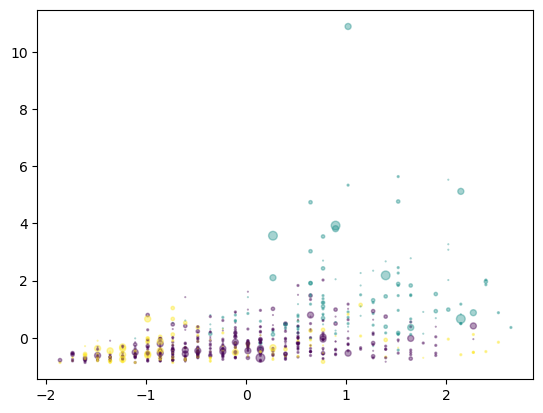

In [183]:
area = np.pi*X[:, 1]**2
plt.scatter(X[:, 0], X[:, 3], s = area , c = labels.astype(float), alpha = 0.4)
plt.plot()



